# PARTE 1 - DADOS DOS JOGOS

In [51]:
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Função para extrair dados dos jogos de uma temporada específica
def extrair_jogos_nba(temporada_inicio):
    """
    Extrai os dados dos jogos da NBA para a temporada especificada.
    
    Args:
        temporada_inicio (int): Ano de início da temporada. Ex: 2023 para 2023-24.
        
    Returns:
        pandas.DataFrame: Dados dos jogos da temporada.
    """
    # Usando o LeagueGameFinder para buscar os jogos
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=f"{temporada_inicio}-{str(temporada_inicio + 1)[-2:]}")
    
    # Transformar os dados em um DataFrame
    games = gamefinder.get_data_frames()[0]
    return games

# Extração das temporadas 2023-24 e 2024-25
dados_2023_24 = extrair_jogos_nba(2023)
dados_2024_25 = extrair_jogos_nba(2024)

# Concatenar os dados das duas temporadas
dados_nba = pd.concat([dados_2023_24, dados_2024_25])

# Exibir informações gerais
print(f"Número de jogos coletados: {len(dados_nba)}")
print(dados_nba.head())

# Salvar os dados em um arquivo CSV
# dados_nba.to_csv("nba_games_2023_2025.csv", index=False)
# print("Dados salvos em 'nba_games_2023_2025.csv'.")


Número de jogos coletados: 6745
  SEASON_ID     TEAM_ID TEAM_ABBREVIATION         TEAM_NAME     GAME_ID  \
0     42023  1610612738               BOS    Boston Celtics  0042300405   
1     42023  1610612742               DAL  Dallas Mavericks  0042300405   
2     42023  1610612742               DAL  Dallas Mavericks  0042300404   
3     42023  1610612738               BOS    Boston Celtics  0042300404   
4     42023  1610612742               DAL  Dallas Mavericks  0042300403   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0  2024-06-17  BOS vs. DAL  W  240  106  ...   0.850    15    36   51   25   
1  2024-06-17    DAL @ BOS  L  240   88  ...   0.538     7    28   35   18   
2  2024-06-14  DAL vs. BOS  W  240  122  ...   0.682    13    39   52   21   
3  2024-06-14    BOS @ DAL  L  239   84  ...   0.923     4    27   31   18   
4  2024-06-12  DAL vs. BOS  L  240   99  ...   0.875     7    36   43   15   

   STL  BLK  TOV  PF  PLUS_MINUS  
0    9    2  

In [52]:
dados_nba.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [53]:
variables_dict = {
    "SEASON_ID": "Identificador da temporada (ex.: '22023' para a temporada 2023-2024).",
    "TEAM_ID": "Identificador único do time.",
    "TEAM_ABBREVIATION": "Abreviação do nome do time (ex.: 'CHA' para Charlotte Hornets).",
    "TEAM_NAME": "Nome completo do time (ex.: 'Charlotte Hornets').",
    "GAME_ID": "Identificador único da partida.",
    "GAME_DATE": "Data em que o jogo foi realizado (formato YYYY-MM-DD).",
    "MATCHUP": "Confronto da partida, incluindo local (ex.: 'CHA vs BOS' ou 'CHA @ BOS').",
    "WL": "Resultado do jogo para o time (W = Vitória, L = Derrota).",
    "MIN": "Minutos totais jogados pelo jogador na partida.",
    "PTS": "Pontos marcados pelo jogador na partida.",
    "FGM": "Field Goals Made - Arremessos de quadra convertidos.",
    "FGA": "Field Goals Attempted - Arremessos de quadra tentados.",
    "FG_PCT": "Field Goal Percentage - Porcentagem de acertos nos arremessos de quadra.",
    "FG3M": "3-Point Field Goals Made - Cestas de 3 pontos convertidas.",
    "FG3A": "3-Point Field Goals Attempted - Cestas de 3 pontos tentadas.",
    "FG3_PCT": "3-Point Field Goal Percentage - Porcentagem de acertos nos arremessos de 3 pontos.",
    "FTM": "Free Throws Made - Lances livres convertidos.",
    "FTA": "Free Throws Attempted - Lances livres tentados.",
    "FT_PCT": "Free Throw Percentage - Porcentagem de acertos nos lances livres.",
    "OREB": "Offensive Rebounds - Rebotes ofensivos capturados.",
    "DREB": "Defensive Rebounds - Rebotes defensivos capturados.",
    "REB": "Rebounds - Total de rebotes (ofensivos + defensivos).",
    "AST": "Assists - Total de assistências.",
    "STL": "Steals - Total de roubos de bola.",
    "BLK": "Blocks - Total de bloqueios (tocos).",
    "TOV": "Turnovers - Total de perdas de posse de bola.",
    "PF": "Personal Fouls - Faltas pessoais cometidas.",
    "PLUS_MINUS": "Plus/Minus - Diferença de pontos no placar enquanto o jogador estava em quadra."
}

In [54]:
# Função para extrair jogos de um time em uma temporada específica
def extrair_jogos_time(temporada_inicio, time):
    """
    Extrai os dados dos jogos de um time específico em uma temporada.
    
    Args:
        temporada_inicio (int): Ano de início da temporada. Ex: 2023 para 2023-24.
        time (str): Nome completo do time. Ex: "Charlotte Hornets".
        
    Returns:
        pandas.DataFrame: Dados dos jogos do time na temporada.
    """
    # Usando o LeagueGameFinder para buscar jogos da temporada
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=f"{temporada_inicio}-{str(temporada_inicio + 1)[-2:]}")
    
    # Transformar os dados em um DataFrame
    games = gamefinder.get_data_frames()[0]
    
    # Filtrar jogos do time (casa ou visitante)
    jogos_time = games[
        (games['TEAM_NAME'] == time)
    ]
    return jogos_time

# Nome do time
team_name = "Charlotte Hornets"

# Extração para as temporadas 2023-24 e 2024-25
jogos_2023_24 = extrair_jogos_time(2023, team_name)
jogos_2024_25 = extrair_jogos_time(2024, team_name)

# Concatenar os dados das duas temporadas
jogos_hornets = pd.concat([jogos_2023_24, jogos_2024_25])

# Exibir informações gerais
print(f"Número de jogos coletados para {team_name}: {len(jogos_hornets)}")
print(jogos_hornets.head())

# Salvar os dados em um arquivo CSV
# jogos_hornets.to_csv(f"{team_name.replace(' ', '_').lower()}_games_2023_2025.csv", index=False)
# print(f"Dados salvos em '{team_name.replace(' ', '_').lower()}_games_2023_2025.csv'.")

Número de jogos coletados para Charlotte Hornets: 133
    SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME     GAME_ID  \
180     22023  1610612766               CHA  Charlotte Hornets  0022301187   
236     22023  1610612766               CHA  Charlotte Hornets  0022301173   
257     22023  1610612766               CHA  Charlotte Hornets  0022301159   
273     22023  1610612766               CHA  Charlotte Hornets  0022301144   
315     22023  1610612766               CHA  Charlotte Hornets  0022301135   

      GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
180  2024-04-14    CHA @ CLE  W  241  120  ...   0.818    10    37   47   36   
236  2024-04-12    CHA @ BOS  L  240   98  ...   0.864     4    29   33   20   
257  2024-04-10    CHA @ ATL  W  241  115  ...   0.955     5    28   33   25   
273  2024-04-09  CHA vs. DAL  L  240  104  ...   0.762     8    31   39   24   
315  2024-04-07  CHA vs. OKC  L  241  118  ...   0.786     7    29   36   29 

In [55]:
# 1. Verificar dados ausentes
print("Dados Ausentes:")
print(jogos_hornets.isnull().sum())  # Contagem de valores nulos
print("\n")

Dados Ausentes:
SEASON_ID            0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_NAME            0
GAME_ID              0
GAME_DATE            0
MATCHUP              0
WL                   0
MIN                  0
PTS                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PLUS_MINUS           0
dtype: int64




In [56]:
# 2. Verificar valores redundantes (duplicados)
print("Valores Duplicados:")
print(jogos_hornets.duplicated().sum())  # Contagem de linhas duplicadas
print("\n")

Valores Duplicados:
0




In [57]:
# 3. Verificar inconsistências (valores fora do padrão esperado)
print("Resumo Estatístico:")
print(jogos_hornets.describe(include="all"))  # Resumo estatístico de variáveis numéricas e categóricas
print("\n")

Resumo Estatístico:
       SEASON_ID       TEAM_ID TEAM_ABBREVIATION          TEAM_NAME  \
count        133  1.330000e+02               133                133   
unique         4           NaN                 1                  1   
top        22023           NaN               CHA  Charlotte Hornets   
freq          82           NaN               133                133   
mean         NaN  1.610613e+09               NaN                NaN   
std          NaN  0.000000e+00               NaN                NaN   
min          NaN  1.610613e+09               NaN                NaN   
25%          NaN  1.610613e+09               NaN                NaN   
50%          NaN  1.610613e+09               NaN                NaN   
75%          NaN  1.610613e+09               NaN                NaN   
max          NaN  1.610613e+09               NaN                NaN   

           GAME_ID   GAME_DATE      MATCHUP   WL         MIN         PTS  ...  \
count          133         133          133  1

In [58]:
# 4. Detectar valores enviesados (distribuições assimétricas)
numeric_columns = jogos_hornets.select_dtypes(include=[np.number]).columns
print("Skewness (Assimetria das Distribuições):")
print(jogos_hornets[numeric_columns].skew())  # Valores próximos de 0 indicam baixa assimetria
print("\n")

Skewness (Assimetria das Distribuições):
TEAM_ID       0.000000
MIN           4.254215
PTS          -0.118766
FGM          -0.023766
FGA           0.177273
FG_PCT        0.309360
FG3M          0.261137
FG3A          0.326866
FG3_PCT       0.067341
FTM           0.249054
FTA           0.283792
FT_PCT       -0.334471
OREB          0.687405
DREB          0.331118
REB           0.496324
AST           0.210885
STL           0.087832
BLK           0.296514
TOV           0.612592
PF            0.043214
PLUS_MINUS   -0.240687
dtype: float64




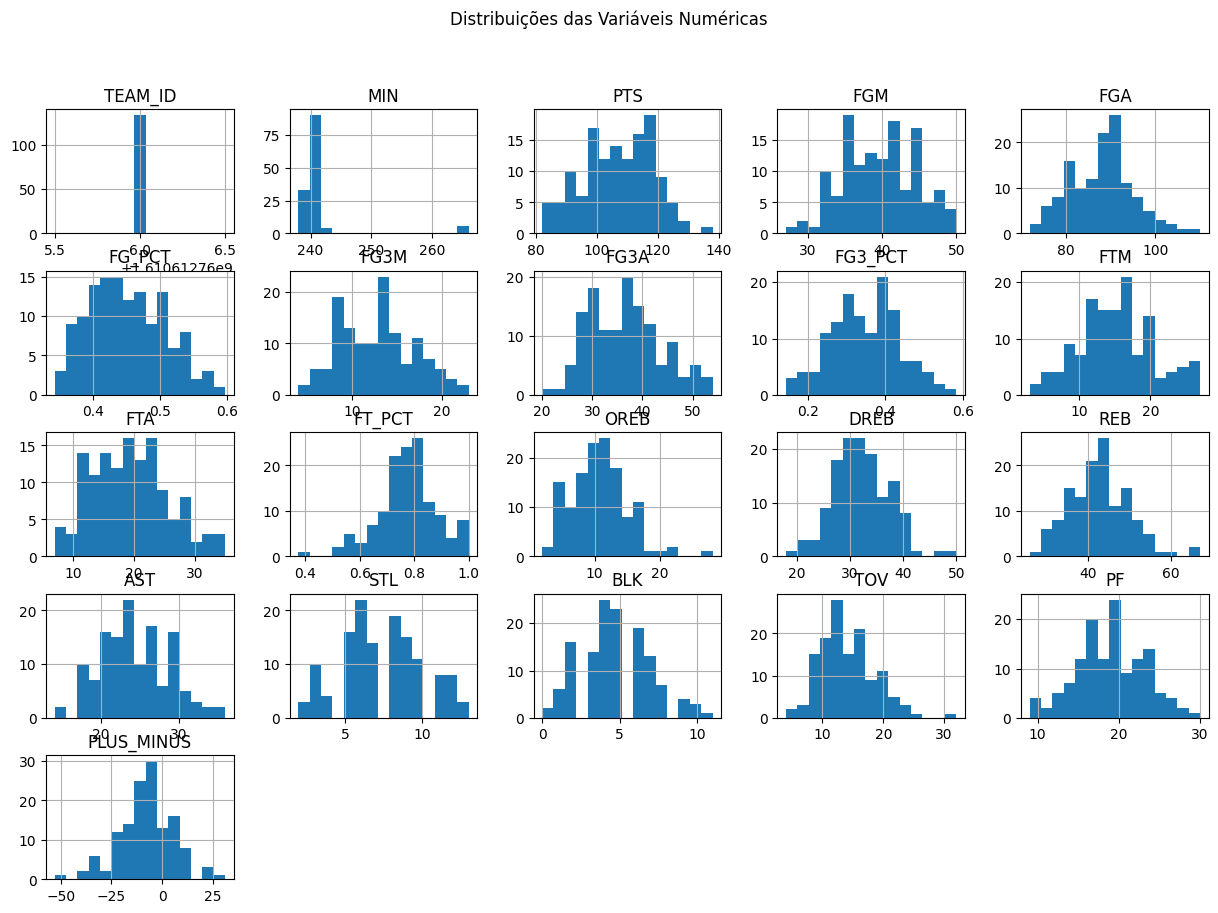

In [59]:
# Visualizar distribuições das variáveis numéricas
jogos_hornets[numeric_columns].hist(figsize=(15, 10), bins=15)
plt.suptitle("Distribuições das Variáveis Numéricas")
plt.show()

In [60]:
# 5. Detectar valores ruidosos e outliers
print("Outliers (utilizando o método IQR):")
for column in numeric_columns:
    Q1 = jogos_hornets[column].quantile(0.25)  # Primeiro quartil
    Q3 = jogos_hornets[column].quantile(0.75)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo interquartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = jogos_hornets[(jogos_hornets[column] < lower_bound) | (jogos_hornets[column] > upper_bound)]
    if not outliers.empty:
        print(f"Coluna {column} tem {len(outliers)} outliers.")
print("\n")

Outliers (utilizando o método IQR):
Coluna MIN tem 8 outliers.
Coluna FGA tem 2 outliers.
Coluna FT_PCT tem 3 outliers.
Coluna OREB tem 3 outliers.
Coluna DREB tem 1 outliers.
Coluna REB tem 2 outliers.
Coluna BLK tem 1 outliers.
Coluna TOV tem 1 outliers.
Coluna PLUS_MINUS tem 5 outliers.




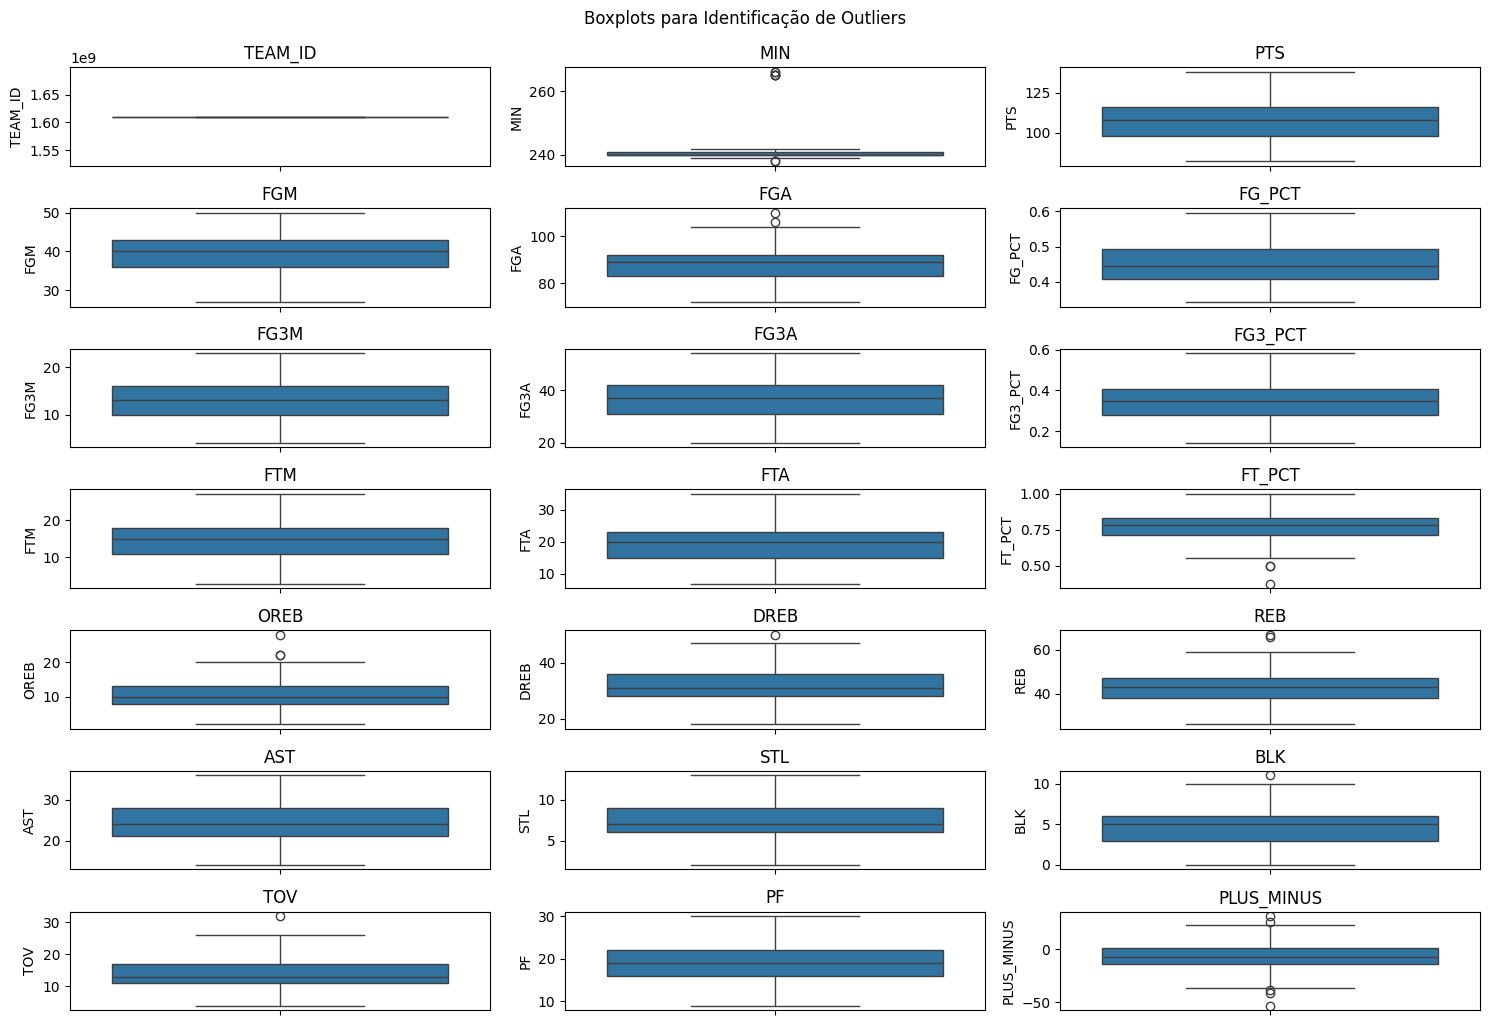

In [61]:
# Visualizar os outliers com boxplots
plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns for the subplots
num_cols = 3  # Number of columns
num_rows = int(np.ceil(len(numeric_columns) / num_cols)) # Number of rows calculated dynamically

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Adjusted subplot layout
    sns.boxplot(data=jogos_hornets, y=column)
    plt.title(column)

plt.tight_layout()
plt.suptitle("Boxplots para Identificação de Outliers", y=1.02)
plt.show()

Justificativa: A Coluna como MIN (minutos jogados): Apresenta um valor que pode ser legítimo, pois um jogador pode ter tido tempos de jogo muito altos ou baixos.
FGA, FTA, REB, PLUS_MINUS, etc.: Estes valores extremos podem ocorrer naturalmente em desempenhos excepcionais, então o contexto dos jogos deve ser considerado.

In [62]:
# Imputação de Outliers (ajuste de valores extremos)
# Clamping (limitação): Ajusta os outliers para os limites do intervalo IQR.

# for column in ['MIN', 'FGA', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'BLK', 'TOV', 'PLUS_MINUS']:
#     Q1 = jogos_hornets[column].quantile(0.25)
#     Q3 = jogos_hornets[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     jogos_hornets[column] = np.where(jogos_hornets[column] < lower_bound, lower_bound, jogos_hornets[column])
#     jogos_hornets[column] = np.where(jogos_hornets[column] > upper_bound, upper_bound, jogos_hornets[column])


In [63]:
# 6. Resumo de possíveis problemas
print("Problemas Identificados:")
if jogos_hornets.isnull().values.any():
    print("- Existem dados ausentes.")
if jogos_hornets.duplicated().any():
    print("- Existem dados redundantes (duplicados).")
if not jogos_hornets[numeric_columns].skew().between(-0.5, 0.5).all():
    print("- Existem variáveis com distribuição enviesada.")
print("- Análise de outliers foi realizada (veja os gráficos de boxplot).")

Problemas Identificados:
- Existem variáveis com distribuição enviesada.
- Análise de outliers foi realizada (veja os gráficos de boxplot).


In [64]:
# Transformações Logarítmicas
skewed_columns = ['FGA', 'FTA', 'REB']
for column in skewed_columns:
    jogos_hornets[column] = np.log1p(jogos_hornets[column])  # log(1 + valor)

In [65]:
# Normalização ou Padronização
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
jogos_hornets[numeric_columns] = scaler.fit_transform(jogos_hornets[numeric_columns])

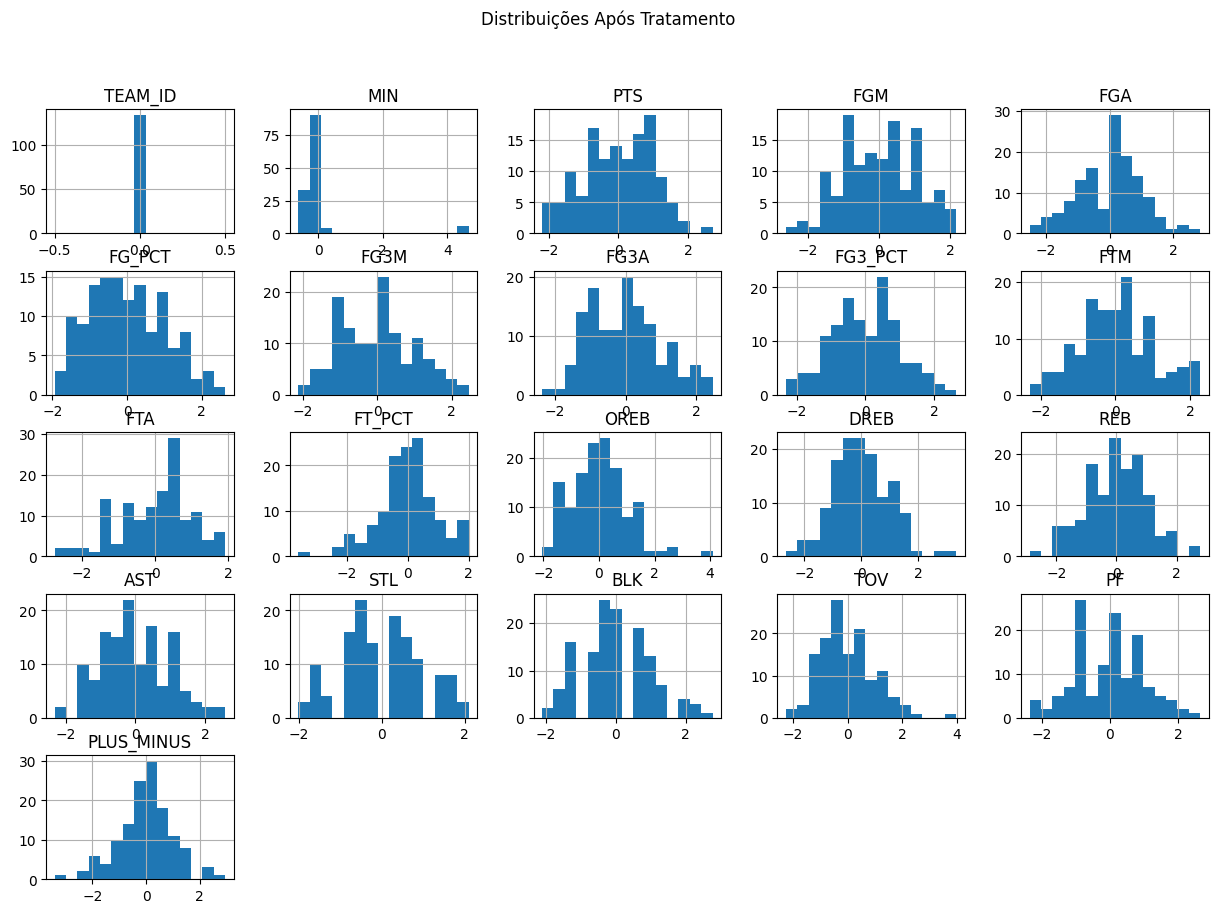

In [66]:
# Histogramas
jogos_hornets[numeric_columns].hist(figsize=(15, 10), bins=15)
plt.suptitle("Distribuições Após Tratamento")
plt.show()

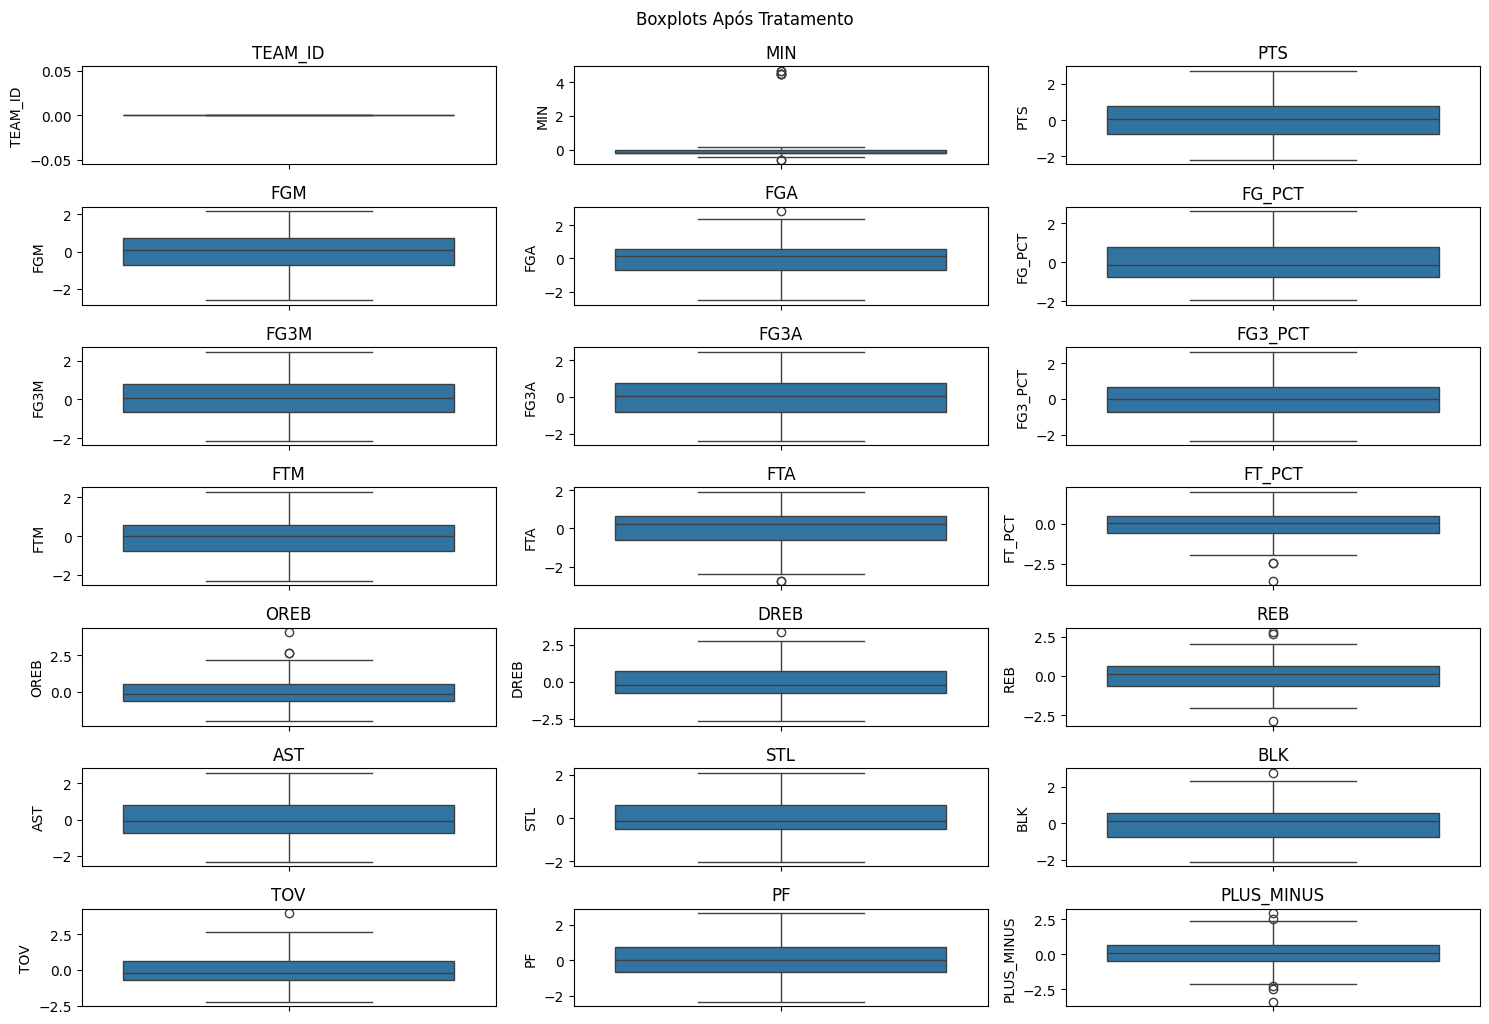

In [67]:
# Boxplots
plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns for the subplots
num_cols = 3  # Number of columns
num_rows = int(np.ceil(len(numeric_columns) / num_cols)) # Number of rows calculated dynamically


for i, column in enumerate(numeric_columns):
    # Adjust the subplot layout to accommodate all numeric columns
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=jogos_hornets, y=column)
    plt.title(column)

plt.tight_layout()
plt.suptitle("Boxplots Após Tratamento", y=1.02)
plt.show()

In [68]:
# Excluir colunas que não são importantes para o modelo de previsão
columns_to_drop = ["GAME_DATE", "GAME_ID", "TEAM_ID", "TEAM_NAME"]
jogos_hornets = jogos_hornets.drop(columns=columns_to_drop, errors="ignore")

In [69]:
# 1. Converter dados qualitativos para quantitativos
from sklearn.preprocessing import LabelEncoder, StandardScaler

qualitative_columns = jogos_hornets.select_dtypes(include=["object"]).columns  # Identificar colunas categóricas
label_encoders = {}
for column in qualitative_columns:
    le = LabelEncoder()
    jogos_hornets[column] = le.fit_transform(jogos_hornets[column])
    label_encoders[column] = le

In [70]:
# 3. Verificar a transformação
print("Dados transformados:")
print(jogos_hornets.head())

Dados transformados:
     SEASON_ID  TEAM_ABBREVIATION  MATCHUP  WL       MIN       PTS       FGM  \
180          2                  0        4   1 -0.045358  1.132807  1.339021   
236          2                  0        2   0 -0.233878 -0.787583 -1.573663   
257          2                  0        0   1 -0.045358  0.696355  0.090728   
273          2                  0       34   0 -0.233878 -0.263840 -0.117321   
315          2                  0       48   0 -0.045358  0.958226  1.130972   

          FGA    FG_PCT      FG3M  ...    FT_PCT      OREB      DREB  \
180  0.444133  0.978174  1.497365  ...  0.377211 -0.155961  0.909319   
236 -1.835518 -0.525218  0.530620  ...  0.789315 -1.570241 -0.590705   
257 -1.345971  0.996071  0.288933  ...  1.604563 -1.334528 -0.778208   
273  0.162622 -0.220960 -0.677812  ... -0.124480 -0.627387 -0.215699   
315 -0.721055  1.640382  1.013993  ...  0.090531 -0.863101 -0.590705   

          REB       AST       STL       BLK       TOV        PF  

In [71]:
# 4. (Opcional) Salvar o dataset transformado
# jogos_hornets.to_csv("charlotte_hornets_games_transformed.csv", index=False)

In [72]:
#RF1
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
# Lista de times organizados por conferência
eastern_conference_teams = [
    "ATL", "BOS", "BKN", "CHA", "CHI", "CLE", "DET", "IND", "MIA", "MIL",
    "NYK", "ORL", "PHI", "TOR", "WAS"
]

western_conference_teams = [
    "DAL", "DEN", "GSW", "HOU", "LAC", "LAL", "MEM", "MIN", "NOP", "OKC",
    "PHX", "POR", "SAC", "SAS", "UTA"
]

# Função para listar todos os times agrupados por conferência
def get_teams_by_conference():
    nba_teams = teams.get_teams()
    eastern_conference = [team for team in nba_teams if team["abbreviation"] in eastern_conference_teams]
    western_conference = [team for team in nba_teams if team["abbreviation"] in western_conference_teams]
    return eastern_conference, western_conference

# Função para buscar jogos por temporada
def get_games_by_season(season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    return games

In [73]:
# Listar os times da NBA por conferência
eastern, western = get_teams_by_conference()

print("Eastern Conference Teams:")
for team in eastern:
    print(f"{team['full_name']} ({team['abbreviation']})")

print("\nWestern Conference Teams:")
for team in western:
    print(f"{team['full_name']} ({team['abbreviation']})")

# Buscar dados dos jogos das temporadas 2023-24 e 2024-25
games_2023_24 = get_games_by_season("2023-24")
games_2024_25 = get_games_by_season("2024-25")

# Visualizar a estrutura dos dados
print("\nJogos da temporada 2023-24:")
print(games_2023_24.head())

print("\nJogos da temporada 2024-25:")
print(games_2024_25.head())

Eastern Conference Teams:
Atlanta Hawks (ATL)
Boston Celtics (BOS)
Cleveland Cavaliers (CLE)
Chicago Bulls (CHI)
Miami Heat (MIA)
Milwaukee Bucks (MIL)
Brooklyn Nets (BKN)
New York Knicks (NYK)
Orlando Magic (ORL)
Indiana Pacers (IND)
Philadelphia 76ers (PHI)
Toronto Raptors (TOR)
Washington Wizards (WAS)
Detroit Pistons (DET)
Charlotte Hornets (CHA)

Western Conference Teams:
New Orleans Pelicans (NOP)
Dallas Mavericks (DAL)
Denver Nuggets (DEN)
Golden State Warriors (GSW)
Houston Rockets (HOU)
Los Angeles Clippers (LAC)
Los Angeles Lakers (LAL)
Minnesota Timberwolves (MIN)
Phoenix Suns (PHX)
Portland Trail Blazers (POR)
Sacramento Kings (SAC)
San Antonio Spurs (SAS)
Oklahoma City Thunder (OKC)
Utah Jazz (UTA)
Memphis Grizzlies (MEM)

Jogos da temporada 2023-24:
  SEASON_ID     TEAM_ID TEAM_ABBREVIATION         TEAM_NAME     GAME_ID  \
0     42023  1610612738               BOS    Boston Celtics  0042300405   
1     42023  1610612742               DAL  Dallas Mavericks  0042300405   
2

In [74]:
# RF2
from nba_api.stats.endpoints import leaguestandings
# Obter os dados de classificação
standings = leaguestandings.LeagueStandings()
standings_df = standings.get_data_frames()[0]

# Exibir as primeiras linhas e os nomes das colunas
print(standings_df.head())  # Mostra os primeiros registros
# print(standings_df.columns)  # Lista todas as colunas disponíveis

  LeagueID SeasonID      TeamID       TeamCity   TeamName Conference  \
0       00    22024  1610612739      Cleveland  Cavaliers       East   
1       00    22024  1610612760  Oklahoma City    Thunder       West   
2       00    22024  1610612738         Boston    Celtics       East   
3       00    22024  1610612745        Houston    Rockets       West   
4       00    22024  1610612752       New York     Knicks       East   

  ConferenceRecord  PlayoffRank ClinchIndicator   Division  ...   May   Jun  \
0            23-6             1                    Central  ...  None  None   
1            21-7             1                  Northwest  ...  None  None   
2            23-9             2                   Atlantic  ...  None  None   
3            19-9             2                  Southwest  ...  None  None   
4            22-10            3                   Atlantic  ...  None  None   

    Jul   Aug   Sep  Oct   Nov   Dec  PreAS PostAS  
0  None  None  None  5-0  12-3  12-1   

In [75]:
# Função para buscar jogos por temporada
def get_games_by_season(season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    return games

# Função para calcular a posição atual
def calculate_standings(games):
    # Filtrar jogos já realizados
    games_played = games[games['WL'].notnull()]
    
    # Calcular vitórias e derrotas
    standings = games_played.groupby('TEAM_ABBREVIATION').agg(
        Wins=('WL', lambda x: (x == 'W').sum()),
        Losses=('WL', lambda x: (x == 'L').sum())
    )
    
    # Adicionar a taxa de vitória (Win Percentage)
    standings['Win_Percentage'] = standings['Wins'] / (standings['Wins'] + standings['Losses'])
    
    # Ordenar por taxa de vitória
    standings = standings.sort_values(by='Win_Percentage', ascending=False).reset_index()
    return standings

# Função para exibir standings agrupados por conferência
def display_standings_by_conference(standings):
    eastern_standings = standings[standings['TEAM_ABBREVIATION'].isin(eastern_conference_teams)]
    western_standings = standings[standings['TEAM_ABBREVIATION'].isin(western_conference_teams)]

    print("\nEastern Conference Standings:")
    print(eastern_standings[['TEAM_ABBREVIATION', 'Wins', 'Losses', 'Win_Percentage']].to_string(index=False))

    print("\nWestern Conference Standings:")
    print(western_standings[['TEAM_ABBREVIATION', 'Wins', 'Losses', 'Win_Percentage']].to_string(index=False))

In [76]:
# Obter dados dos jogos da temporada atual (2024-25)
games_2024_25 = get_games_by_season("2024-25")

# Calcular a classificação
current_standings = calculate_standings(games_2024_25)

# Exibir a classificação agrupada por conferência
display_standings_by_conference(current_standings)


Eastern Conference Standings:
TEAM_ABBREVIATION  Wins  Losses  Win_Percentage
              CLE    36      13        0.734694
              BOS    36      15        0.705882
              NYK    34      17        0.666667
              MIL    27      21        0.562500
              IND    27      22        0.551020
              MIA    26      23        0.530612
              DET    26      24        0.520000
              ORL    25      25        0.500000
              ATL    23      26        0.469388
              CHI    22      29        0.431373
              PHI    20      30        0.400000
              TOR    16      34        0.320000
              BKN    15      35        0.300000
              CHA    14      33        0.297872
              WAS     8      41        0.163265

Western Conference Standings:
TEAM_ABBREVIATION  Wins  Losses  Win_Percentage
              OKC    41      10        0.803922
              HOU    33      15        0.687500
              MEM    34   

In [77]:
# RF3
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular os totais de vitórias e derrotas
def calculate_team_totals(team_games):
    # Verificar vitórias e derrotas em casa e fora
    team_games['Home/Away'] = team_games['MATCHUP'].apply(lambda x: 'Home' if 'vs.' in x else 'Away')

    totals = {
        "Total Wins": (team_games['WL'] == 'W').sum(),
        "Total Home Wins": ((team_games['WL'] == 'W') & (team_games['Home/Away'] == 'Home')).sum(),
        "Total Away Wins": ((team_games['WL'] == 'W') & (team_games['Home/Away'] == 'Away')).sum(),
        "Total Losses": (team_games['WL'] == 'L').sum(),
        "Total Home Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Home')).sum(),
        "Total Away Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Away')).sum(),
    }
    return totals

In [78]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular os totais
team_totals = calculate_team_totals(all_games)

In [79]:
# Exibir os resultados
print("Charlotte Hornets - Totais nas Temporadas 2023-24 e 2024-25:")
for key, value in team_totals.items():
    print(f"{key}: {value}")

Charlotte Hornets - Totais nas Temporadas 2023-24 e 2024-25:
Total Wins: 36
Total Home Wins: 21
Total Away Wins: 15
Total Losses: 97
Total Home Losses: 46
Total Away Losses: 51


In [80]:
# RF4

# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular os totais e médias por jogo
def calculate_team_stats(team_games):
    # Verificar jogos em casa e fora
    team_games['Home/Away'] = team_games['MATCHUP'].apply(lambda x: 'Home' if 'vs.' in x else 'Away')
    
    # Calcular estatísticas
    stats = {
        "Total Points per Game": team_games['PTS'].mean(),
        "Total Assists per Game": team_games['AST'].mean(),
        "Total Rebounds per Game": team_games['REB'].mean(),
        "Total 3-Point Field Goals Made": team_games['FG3M'].sum(),
        "Total Home Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Home')).sum(),
        "Total Away Losses": ((team_games['WL'] == 'L') & (team_games['Home/Away'] == 'Away')).sum()
    }
    return stats

In [81]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular as estatísticas
team_stats = calculate_team_stats(all_games)


In [82]:
# Exibir os resultados
print("Charlotte Hornets - Estatísticas Totais nas Temporadas 2023-24 e 2024-25:")
for key, value in team_stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

Charlotte Hornets - Estatísticas Totais nas Temporadas 2023-24 e 2024-25:
Total Points per Game: 107.02
Total Assists per Game: 24.41
Total Rebounds per Game: 42.81
Total 3-Point Field Goals Made: 1703
Total Home Losses: 46
Total Away Losses: 51


In [83]:
# RF5
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular a divisão de dados
def calculate_rebounds_and_scoring(team_games):
    # Calcular totais
    totals = {
        "Total Rebounds": team_games['REB'].sum(),
        "Total Offensive Rebounds": team_games['OREB'].sum(),
        "Total Defensive Rebounds": team_games['DREB'].sum(),
        "Total Points": team_games['PTS'].sum(),
        "Total 2-Point Field Goals Made": (team_games['FGM'] - team_games['FG3M']).sum(),
        "Total 3-Point Field Goals Made": team_games['FG3M'].sum(),
        "Total Free Throws Made": team_games['FTM'].sum()
    }
    return totals

In [84]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular os totais
rebounds_and_scoring_totals = calculate_rebounds_and_scoring(all_games)


In [85]:
# Exibir os resultados
print("Charlotte Hornets - Totais de Rebotes e Pontuações (Temporadas 2023-24 e 2024-25):")
for key, value in rebounds_and_scoring_totals.items():
    print(f"{key}: {value}")

Charlotte Hornets - Totais de Rebotes e Pontuações (Temporadas 2023-24 e 2024-25):
Total Rebounds: 5694
Total Offensive Rebounds: 1418
Total Defensive Rebounds: 4276
Total Points: 14234
Total 2-Point Field Goals Made: 3559
Total 3-Point Field Goals Made: 1703
Total Free Throws Made: 2007


In [86]:
# RF6
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para calcular a performance defensiva
def calculate_defensive_performance(team_games):
    # Calcular totais
    defensive_performance = {
        "Total Steals": team_games['STL'].sum(),
        "Total Defensive Rebounds": team_games['DREB'].sum(),
        "Total Blocks per Game": team_games['BLK'].mean(),
        "Total Turnovers per Game": team_games['TOV'].mean(),
        "Total Personal Fouls per Game": team_games['PF'].mean()
    }
    return defensive_performance


In [87]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Calcular a performance defensiva
defensive_performance_totals = calculate_defensive_performance(all_games)


In [88]:
# Exibir os resultados
print("Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25):")
for key, value in defensive_performance_totals.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

Charlotte Hornets - Performance Defensiva (Temporadas 2023-24 e 2024-25):
Total Steals: 982
Total Defensive Rebounds: 4276
Total Blocks per Game: 4.76
Total Turnovers per Game: 14.13
Total Personal Fouls per Game: 18.87


In [89]:
# RF7
# Função para buscar jogos por temporada de um time específico
def get_team_games(team_abbreviation, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    # Filtrar jogos do time especificado
    team_games = games[games['TEAM_ABBREVIATION'] == team_abbreviation]
    return team_games

# Função para formatar e exibir os jogos com as informações solicitadas
def display_team_games(team_games):
    team_games['GAME_DATE'] = pd.to_datetime(team_games['GAME_DATE'])
    
    # Calcular o adversário
    team_games['OPPONENT'] = team_games['MATCHUP'].apply(lambda x: x.split(' ')[2] if len(x.split(' ')) > 2 else x.split(' ')[0])
    
    # Determinar se foi casa ou fora
    team_games['LOCATION'] = team_games['MATCHUP'].apply(lambda x: 'Casa' if 'vs' in x else 'Fora')
    
    # Calcular vitória ou derrota
    team_games['RESULT'] = team_games['WL'].apply(lambda x: 'Vitória' if x == 'W' else 'Derrota')
    
    # Selecionar as colunas relevantes
    relevant_columns = ['GAME_DATE', 'OPPONENT', 'RESULT', 'LOCATION', 'PTS']
    team_games = team_games[relevant_columns]
    
    # Exibir as informações
    return team_games

In [90]:
# Buscar jogos das temporadas 2023-24 e 2024-25
team_abbreviation = "CHA"  # Charlotte Hornets
games_2023_24 = get_team_games(team_abbreviation, "2023-24")
games_2024_25 = get_team_games(team_abbreviation, "2024-25")

# Concatenar os jogos das duas temporadas
all_games = pd.concat([games_2023_24, games_2024_25])

# Exibir os jogos formatados
team_games_display = display_team_games(all_games)
print(team_games_display)


      GAME_DATE OPPONENT   RESULT LOCATION  PTS
180  2024-04-14      CLE  Vitória     Fora  120
236  2024-04-12      BOS  Derrota     Fora   98
257  2024-04-10      ATL  Vitória     Fora  115
273  2024-04-09      DAL  Derrota     Casa  104
315  2024-04-07      OKC  Derrota     Casa  118
...         ...      ...      ...      ...  ...
2233 2024-10-17      IND  Derrota     Fora  116
2262 2024-10-15      NYK  Derrota     Fora  105
2306 2024-10-10      MEM  Vitória     Fora  119
2321 2024-10-08      MIA  Vitória     Casa  111
2346 2024-10-06      NYK  Derrota     Casa  109

[133 rows x 5 columns]


### RF8

In [91]:
# Supondo que all_games já tenha sido concatenado com os dados das temporadas 2023-24 e 2024-25
# e que a função `display_team_games` foi utilizada para formatar os dados corretamente.

# Função para calcular a vitória/derrota em casa ou fora
def calc_game_types(team_games):
    team_games['RESULT'] = team_games['WL'].apply(lambda x: 'Vitória' if x == 'W' else 'Derrota')
    team_games['LOCATION_TYPE'] = team_games['MATCHUP'].apply(lambda x: 'Casa' if 'vs' in x else 'Fora')
    return team_games

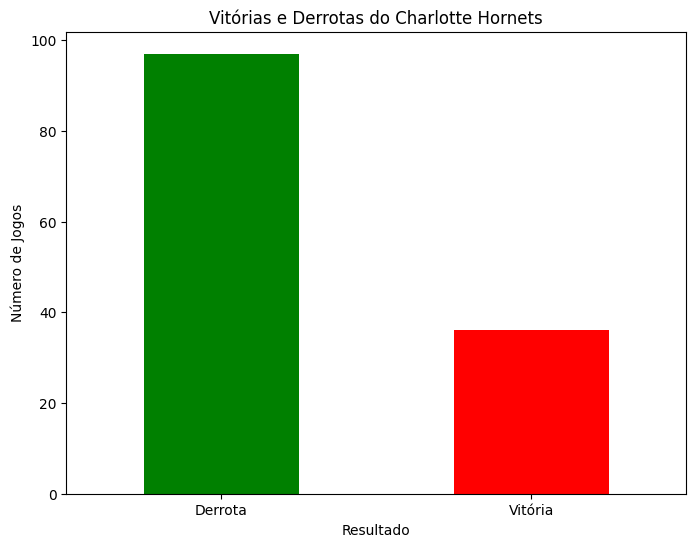

In [92]:
# Aplicando a função
all_games = calc_game_types(all_games)

# Gráfico de Barras Empilhado para Vitórias e Derrotas
victories_losses = all_games.groupby(['RESULT']).size()
ax = victories_losses.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))
ax.set_title('Vitórias e Derrotas do Charlotte Hornets')
ax.set_ylabel('Número de Jogos')
ax.set_xlabel('Resultado')
plt.xticks(rotation=0)
plt.show()

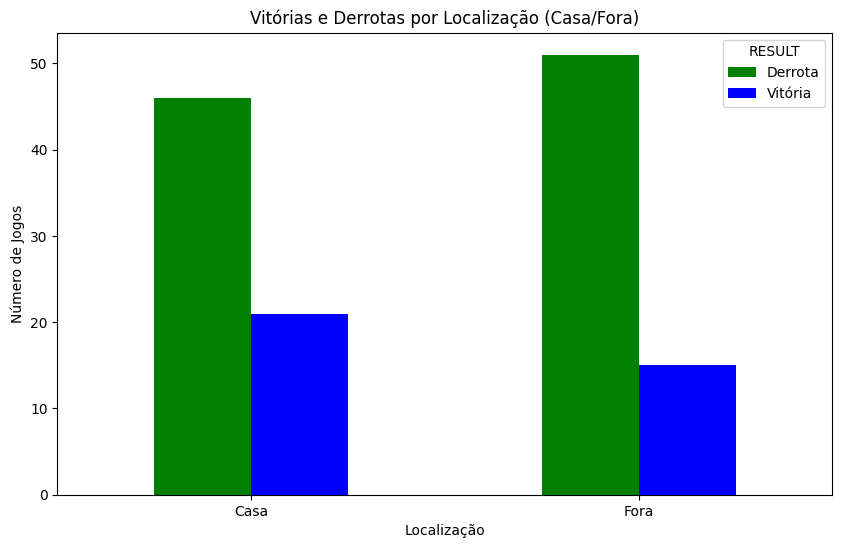

In [93]:
# Gráfico de Barras Agrupado para Vitórias em Casa, Vitórias Fora de Casa, Derrotas em Casa, Derrotas Fora de Casa
location_results = all_games.groupby(['LOCATION_TYPE', 'RESULT']).size().unstack().fillna(0)
location_results.plot(kind='bar', stacked=False, color=['green', 'blue', 'red', 'brown'], figsize=(10, 6))
plt.title('Vitórias e Derrotas por Localização (Casa/Fora)')
plt.ylabel('Número de Jogos')
plt.xlabel('Localização')
plt.xticks(rotation=0)
plt.show()

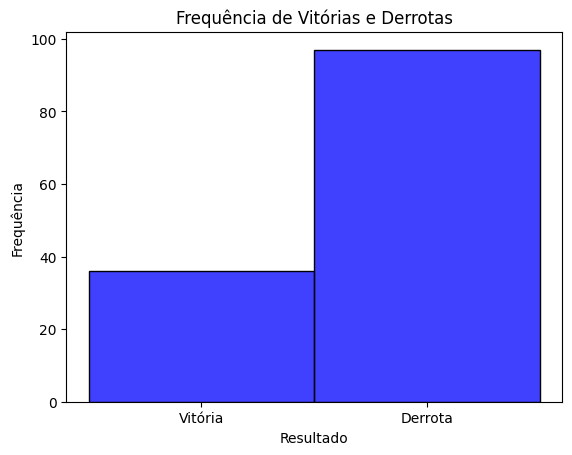

In [94]:
# Gráfico Histograma para Frequência de Vitórias e Derrotas
sns.histplot(all_games['RESULT'], kde=False, color='blue', bins=2)
plt.title('Frequência de Vitórias e Derrotas')
plt.xlabel('Resultado')
plt.ylabel('Frequência')
plt.show()

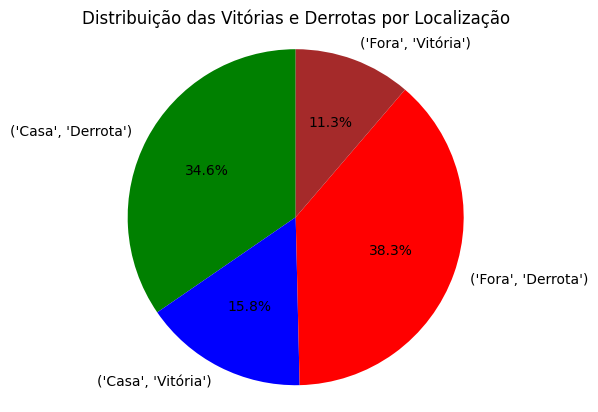

In [95]:
# Gráfico de Setor (Pizza) para Vitórias em Casa, Vitórias Fora, Derrotas em Casa, Derrotas Fora
location_results_counts = all_games.groupby(['LOCATION_TYPE', 'RESULT']).size()
labels = location_results_counts.index.tolist()
sizes = location_results_counts.values
colors = ['green', 'blue', 'red', 'brown']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição das Vitórias e Derrotas por Localização')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [96]:
# Calcular pontos sofridos
all_games['PTS_OPPONENT'] = all_games['PTS'] - all_games['PLUS_MINUS']

In [97]:
# Filtrar jogos em casa e fora
home_games = all_games[all_games['LOCATION_TYPE'] == 'Casa']
away_games = all_games[all_games['LOCATION_TYPE'] == 'Fora']

In [98]:
# Calcular médias de pontos marcados e sofridos
home_points_avg = home_games['PTS'].mean()
home_opponent_points_avg = home_games['PTS_OPPONENT'].mean()
away_points_avg = away_games['PTS'].mean()
away_opponent_points_avg = away_games['PTS_OPPONENT'].mean()

In [99]:
# Exibir as médias
print("Média de pontos marcados em casa:", home_points_avg)
print("Média de pontos sofridos em casa:", home_opponent_points_avg)
print("Média de pontos marcados fora de casa:", away_points_avg)
print("Média de pontos sofridos fora de casa:", away_opponent_points_avg)

Média de pontos marcados em casa: 107.68656716417911
Média de pontos sofridos em casa: 113.67164179104478
Média de pontos marcados fora de casa: 106.34848484848484
Média de pontos sofridos fora de casa: 116.3030303030303


In [100]:
# Dados para o gráfico de radar
labels = np.array(['Pontos Marcados', 'Pontos Sofridos'])
home_values = np.array([home_points_avg, home_opponent_points_avg])
away_values = np.array([away_points_avg, away_opponent_points_avg])

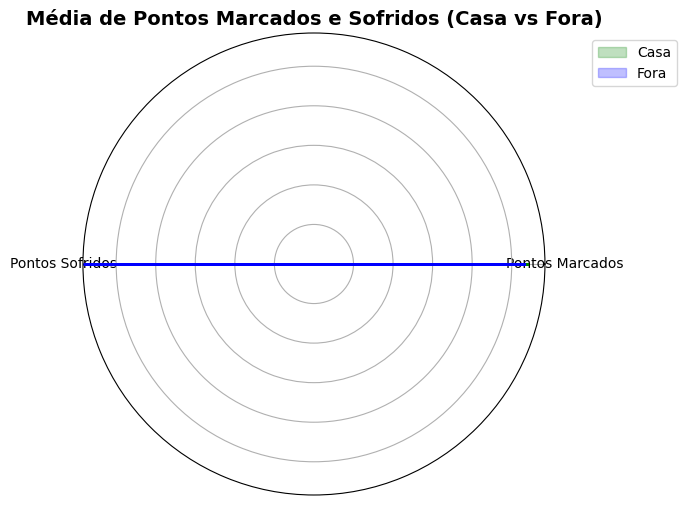

In [101]:
# Configurando os ângulos para o gráfico
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Fechar o gráfico circular

# Adicionando o primeiro valor ao final para fechar o gráfico
home_values = np.concatenate((home_values, [home_values[0]]))
away_values = np.concatenate((away_values, [away_values[0]]))

# Criando o gráfico de radar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, home_values, color='green', alpha=0.25, label='Casa')
ax.fill(angles, away_values, color='blue', alpha=0.25, label='Fora')
ax.plot(angles, home_values, color='green', linewidth=2)
ax.plot(angles, away_values, color='blue', linewidth=2)

# Ajustando rótulos e título
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Média de Pontos Marcados e Sofridos (Casa vs Fora)', size=14, weight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Exibindo o gráfico
plt.show()

In [102]:
print("Média de pontos marcados em casa:", home_points_avg)
print("Média de pontos sofridos em casa:", home_opponent_points_avg)
print("Média de pontos marcados fora:", away_points_avg)
print("Média de pontos sofridos fora:", away_opponent_points_avg)

Média de pontos marcados em casa: 107.68656716417911
Média de pontos sofridos em casa: 113.67164179104478
Média de pontos marcados fora: 106.34848484848484
Média de pontos sofridos fora: 116.3030303030303


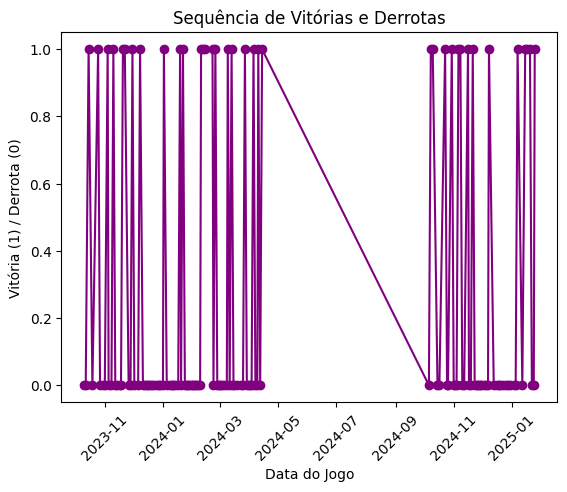

In [103]:
# Gráfico de Linhas para Sequência de Vitórias e Derrotas
sequence = all_games.groupby('GAME_DATE')['RESULT'].apply(lambda x: 'Vitória' if 'Vitória' in x.values else 'Derrota').tolist()
sequence_dates = all_games['GAME_DATE'].drop_duplicates().sort_values()

plt.plot(sequence_dates, [1 if result == 'Vitória' else 0 for result in sequence], marker='o', linestyle='-', color='purple')
plt.title('Sequência de Vitórias e Derrotas')
plt.xlabel('Data do Jogo')
plt.ylabel('Vitória (1) / Derrota (0)')
plt.xticks(rotation=45)
plt.show()


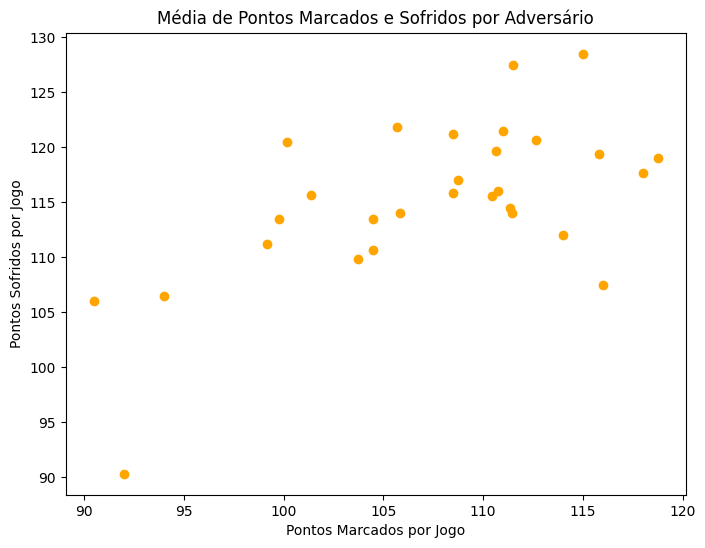

In [104]:
# Gráfico de Dispersão para equipes e Média de Pontos Marcados e Sofridos
team_avg_points = all_games.groupby('OPPONENT').agg({'PTS': 'mean', 'PTS_OPPONENT': 'mean'}).reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(team_avg_points['PTS'], team_avg_points['PTS_OPPONENT'], c='orange')
plt.title('Média de Pontos Marcados e Sofridos por Adversário')
plt.xlabel('Pontos Marcados por Jogo')
plt.ylabel('Pontos Sofridos por Jogo')
plt.show()

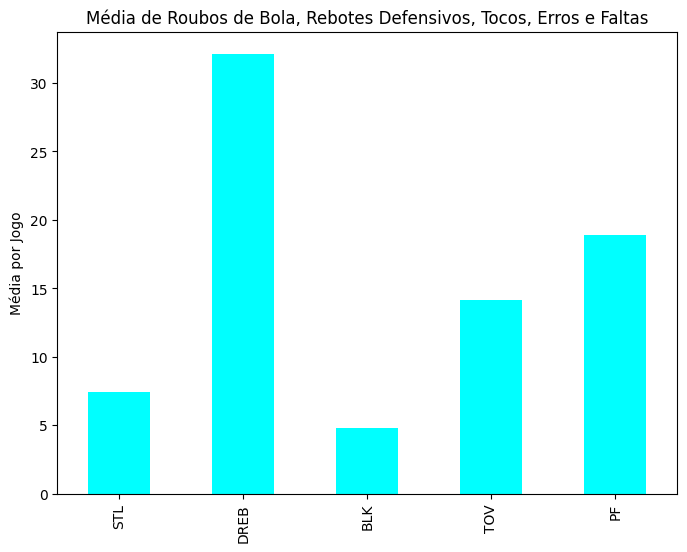

In [105]:
# Gráfico de Barras para Roubos de Bola, Rebotes Defensivos, Tocos por Jogo, Erros por Jogo, Faltas por Jogo
defensive_stats = all_games[['STL', 'DREB', 'BLK', 'TOV', 'PF']].mean()
defensive_stats.plot(kind='bar', color='cyan', figsize=(8, 6))
plt.title('Média de Roubos de Bola, Rebotes Defensivos, Tocos, Erros e Faltas')
plt.ylabel('Média por Jogo')
plt.show()


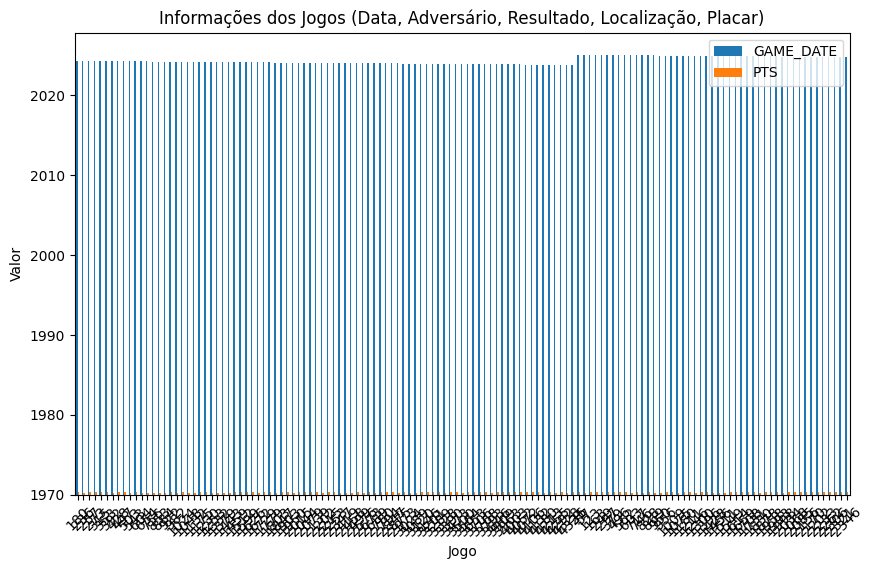

In [106]:
# Gráfico de Barras para Data do Jogo, Adversário, Vitória ou Derrota, Casa ou Fora, Placar
game_info = all_games[['GAME_DATE', 'OPPONENT', 'RESULT', 'LOCATION', 'PTS']]
game_info.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Informações dos Jogos (Data, Adversário, Resultado, Localização, Placar)')
plt.xlabel('Jogo')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()